# COVID-19 PROJECT

COVID-19 is an infectious disease caused by the Corona Virus, biologically known as severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The disease was first identified in Wuhan, the capital of China's Hubei province in December 2019 and has spread all over the world since then. As of writing this, on 26th April 2020, 21:57 IST, there are 2.92 million confirmed cases throughout the world and has resulted in 204,000 deaths according to Google.

In this notebook, I will take a look at the current situation in India. We will take a look at the regions which are most hampered by the outbreak and how numbers have steadily climbed in the country

To start off, we will import the necessary libraries which I will be using in my analysis and the different data tables from where I sourced my information.

# Step 1 : Preparing Environment and Importing libraries

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime 

# Step 2:  Importing dataset

In [31]:
cd=pd.read_csv("covid_19_data.csv",parse_dates=['ObservationDate'],dayfirst=True)

# Step 3: Data wrangling/Processing


In [ ]:
#Explore and observe data
#Check for and treat missing or null values
#Transform data — format data type
#Perform preliminary statistical analysis

In [34]:
#DATA CLEANING AND MANIPULATION

cd.head(7)

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1,0,0
1,2,2020-01-22,Beijing,Mainland China,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,6,0,0
3,4,2020-01-22,Fujian,Mainland China,1,0,0
4,5,2020-01-22,Gansu,Mainland China,0,0,0
5,6,2020-01-22,Guangdong,Mainland China,26,0,0
6,7,2020-01-22,Guangxi,Mainland China,2,0,0


In [35]:
cd.shape

(306429, 7)

In [36]:
cd.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
dtype: object

In [37]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              306429 non-null  int64         
 1   ObservationDate  306429 non-null  datetime64[ns]
 2   Province/State   228329 non-null  object        
 3   Country/Region   306429 non-null  object        
 4   Confirmed        306429 non-null  int64         
 5   Deaths           306429 non-null  int64         
 6   Recovered        306429 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 16.4+ MB


In [38]:
cd=cd.rename(columns={'ObservationDate':'date','Province/State': 'state','Country/Region':'country','Recovered':'cured','Deaths':'deaths','Confirmed':'confirmed','Date':'date'})

In [39]:
cd

,SNo,date,state,country,confirmed,deaths,cured
0,1,2020-01-22,Anhui,Mainland China,1,0,0
1,2,2020-01-22,Beijing,Mainland China,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,6,0,0
3,4,2020-01-22,Fujian,Mainland China,1,0,0
4,5,2020-01-22,Gansu,Mainland China,0,0,0
...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,102641,2335,95289
306425,306426,2021-05-29,Zeeland,Netherlands,29147,245,0
306426,306427,2021-05-29,Zhejiang,Mainland China,1364,1,1324
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,87550,1738,83790


In [40]:
cd.drop(['SNo'],inplace=True,axis=1)

In [41]:
cd

,date,state,country,confirmed,deaths,cured
0,2020-01-22,Anhui,Mainland China,1,0,0
1,2020-01-22,Beijing,Mainland China,14,0,0
2,2020-01-22,Chongqing,Mainland China,6,0,0
3,2020-01-22,Fujian,Mainland China,1,0,0
4,2020-01-22,Gansu,Mainland China,0,0,0
...,...,...,...,...,...,...
306424,2021-05-29,Zaporizhia Oblast,Ukraine,102641,2335,95289
306425,2021-05-29,Zeeland,Netherlands,29147,245,0
306426,2021-05-29,Zhejiang,Mainland China,1364,1,1324
306427,2021-05-29,Zhytomyr Oblast,Ukraine,87550,1738,83790


In [42]:
cd.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
306424    False
306425    False
306426    False
306427    False
306428    False
Length: 306429, dtype: bool

In [43]:
cd.columns

Index(['date', 'state', 'country', 'confirmed', 'deaths', 'cured'], dtype='object')

In [44]:
cd.isnull()

,date,state,country,confirmed,deaths,cured
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
306424,False,False,False,False,False,False
306425,False,False,False,False,False,False
306426,False,False,False,False,False,False
306427,False,False,False,False,False,False


In [45]:
cd.isnull().sum()

date             0
state        78100
country          0
confirmed        0
deaths           0
cured            0
dtype: int64

In [46]:
cd=cd.dropna()

In [47]:
cd.isnull().sum()

date         0
state        0
country      0
confirmed    0
deaths       0
cured        0
dtype: int64

In [48]:
cd.sample(n=10)

,date,state,country,confirmed,deaths,cured
86828,2020-08-13,Mordovia Republic,Russia,4888,38,3768
301750,2021-05-23,Tibet,Mainland China,1,0,1
202035,2021-01-13,Kanagawa,Japan,29753,337,22601
228343,2021-02-16,Unknown,UK,0,0,0
115854,2020-09-21,Krasnodar Krai,Russia,13123,246,10202
21836,2020-04-05,Virgin Islands,US,66,4,0
71290,2020-07-23,Shizuoka,Japan,124,1,89
134839,2020-10-16,Wales,UK,34005,1703,0
284749,2021-01-05,Nagano,Japan,3874,67,3528
273314,2021-04-16,OHiggins,Chile,43822,980,40529


In [49]:
cd.corr()

,confirmed,deaths,cured
confirmed,1.000000,0.881104,0.498839
deaths,0.881104,1.000000,0.421546
cured,0.498839,0.421546,1.000000


In [50]:
cd["active"]=cd['confirmed']-(cd['cured']+cd['deaths'])

C:\Users\SIDDHA~1\AppData\Local\Temp/ipykernel_20924/342909267.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
cd.tail(7)

,date,state,country,confirmed,deaths,cured,active
306422,2021-05-29,Zacatecas,Mexico,30758,2797,0,27961
306423,2021-05-29,Zakarpattia Oblast,Ukraine,61611,1586,58882,1143
306424,2021-05-29,Zaporizhia Oblast,Ukraine,102641,2335,95289,5017
306425,2021-05-29,Zeeland,Netherlands,29147,245,0,28902
306426,2021-05-29,Zhejiang,Mainland China,1364,1,1324,39
306427,2021-05-29,Zhytomyr Oblast,Ukraine,87550,1738,83790,2022
306428,2021-05-29,Zuid-Holland,Netherlands,391559,4252,0,387307


In [52]:
country=cd.pivot_table(index='country',values=['confirmed','deaths','cured','active'],aggfunc=max)

In [53]:
country.tail()

,active,confirmed,cured,deaths
country,,,,
Sweden,246965,251285,0,4320
Taiwan,32,47,17,1
UK,3798418,3910803,4192,112385
US,3725477,3788713,6399531,63236
Ukraine,72729,206278,163588,5076


In [54]:
country['m_rate']=country['deaths']*100/country['confirmed']

In [55]:
country['r_rate']=country['cured']*100/country['confirmed']

In [56]:
country.head()

,active,confirmed,cured,deaths,m_rate,r_rate
country,,,,,,
Australia,8490,20593,19725,820,3.981936,95.784975
Austria,2,2,0,0,0.000000,0.000000
Belgium,156458,156458,0,24921,15.928236,0.000000
Brazil,323620,3254893,2895697,111123,3.414029,88.964430
Canada,40264,537138,515505,11125,2.071162,95.972543


In [33]:
country=country.sort_values(by='confirmed',ascending=False)
country.head()

,active,confirmed,cured,deaths,m_rate,r_rate
country,,,,,,
India,701614,5713215,5339838,94030,1.645833,93.464678
UK,3798418,3910803,4192,112385,2.873706,0.107190
US,3725477,3788713,6399531,63236,1.669063,168.910419
Brazil,323620,3254893,2895697,111123,3.414029,88.964430
Russia,171698,1173637,1058041,20001,1.704190,90.150617


# step: 4  ANALYZE THE DATA

In [5]:
cd.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [15]:
cd.nlargest(5, 'cured')

,date,state,country,confirmed,deaths,cured
179328,2020-12-14,Recovered,US,0,0,6399531
178565,2020-12-13,Recovered,US,0,0,6298082
177802,2020-12-12,Recovered,US,0,0,6246605
177039,2020-11-12,Recovered,US,0,0,6135314
176276,2020-10-12,Recovered,US,0,0,5985047


In [16]:
cd.nsmallest(5, 'deaths')

,date,state,country,confirmed,deaths,cured
118363,2020-09-24,Unknown,Colombia,0,-178,-12684
141534,2020-10-25,Unknown,Colombia,0,-154,-8072
0,2020-01-22,Anhui,Mainland China,1,0,0
1,2020-01-22,Beijing,Mainland China,14,0,0
2,2020-01-22,Chongqing,Mainland China,6,0,0


In [17]:
cd.nlargest(5, 'confirmed')

,date,state,country,confirmed,deaths,cured
298068,2021-05-19,NaN,France,5863138,107390,324444
297303,2021-05-18,NaN,France,5845010,107256,323205
296538,2021-05-17,NaN,France,5829009,107041,321874
295773,2021-05-16,NaN,France,5825659,106845,321026
295008,2021-05-15,NaN,France,5811711,106764,320711


In [18]:
cd.nunique()

date            494
state           737
country         229
confirmed    107146
deaths        20089
cured         74541
dtype: int64

In [19]:
cd.count()

date         306429
state        228329
country      306429
confirmed    306429
deaths       306429
cured        306429
dtype: int64

In [20]:
cd['state'].value_counts()

Unknown                         4123
Amazonas                        1109
Diamond Princess cruise ship     924
Grand Princess                   882
Punjab                           708
                                ... 
Harrison County, KY                1
Johnson County, IA                 1
Queens County, NY                  1
Unassigned Location, VT            1
Charlotte County, FL               1
Name: state, Length: 737, dtype: int64

# Step : 5 Data Visualization

In [34]:
country.style.background_gradient(cmap='rainbow')

,active,confirmed,cured,deaths,m_rate,r_rate
country,,,,,,
India,701614,5713215,5339838,94030,1.645833,93.464678
UK,3798418,3910803,4192,112385,2.873706,0.107190
US,3725477,3788713,6399531,63236,1.669063,168.910419
Brazil,323620,3254893,2895697,111123,3.414029,88.964430
Russia,171698,1173637,1058041,20001,1.704190,90.150617
Colombia,853900,951083,869117,18683,1.964392,91.381825
Peru,848624,878346,1897522,29722,3.383860,216.033545
Italy,164406,834527,768559,33593,4.025394,92.095163
Germany,76817,804733,759500,16717,2.077335,94.379129


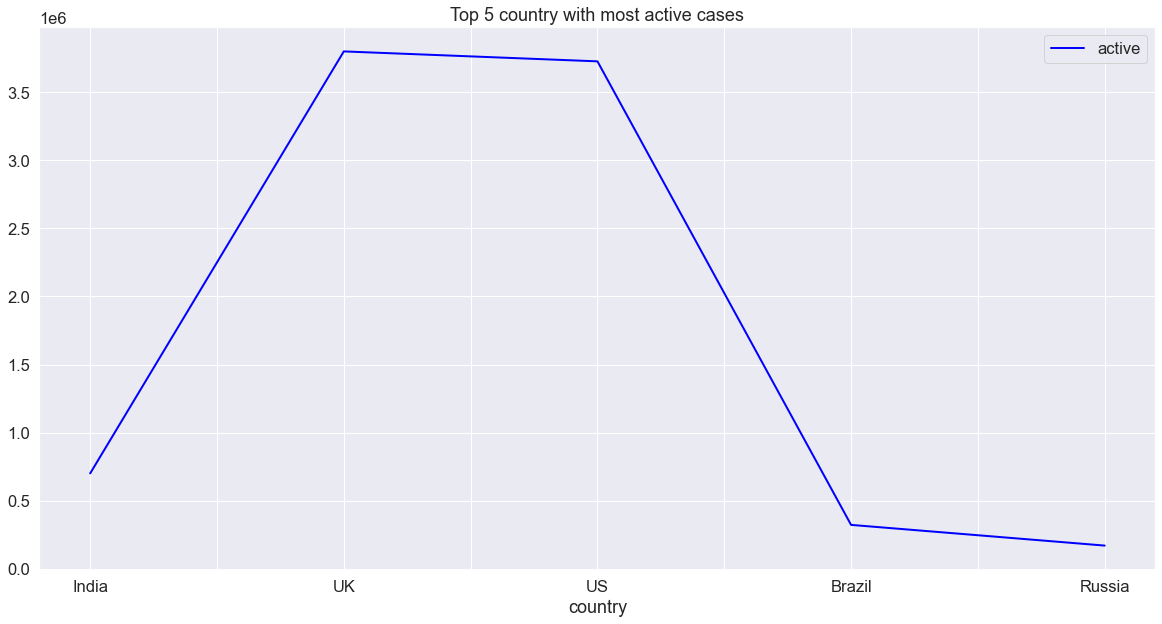

In [165]:
#Top active cases
top_10=country.head(10)
top_10_active=country.head(5)
top_10_active.reset_index().plot(kind='line',x='country',y='active',color='blue',linewidth=2,title='Top 5 country with most active cases',figsize=(20,10))
sns.set(font_scale=1.5)

<AxesSubplot:title={'center':'Top 10 country with most number of confirmed cases'}, xlabel='country'>

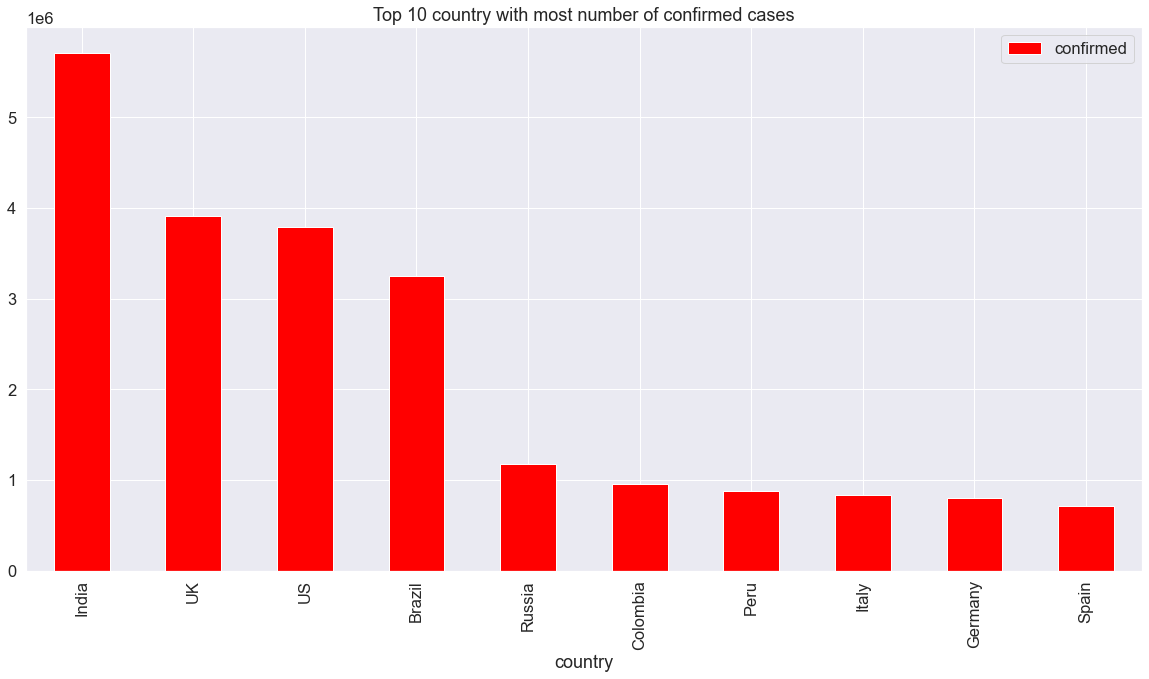

In [112]:
top_10=country.head(10)
top_10.reset_index().plot(kind='bar',x='country',y='confirmed',title='Top 10 country with most number of confirmed cases',color=['Red'],figsize=(20,10))
#sns.set(font_scale=1.5)

In [36]:
top_10_deaths=top_10.sort_values(by='deaths',ascending=False)
top_10_deaths=top_10_deaths.head(5)

Text(0, 0.5, 'no.of deaths')

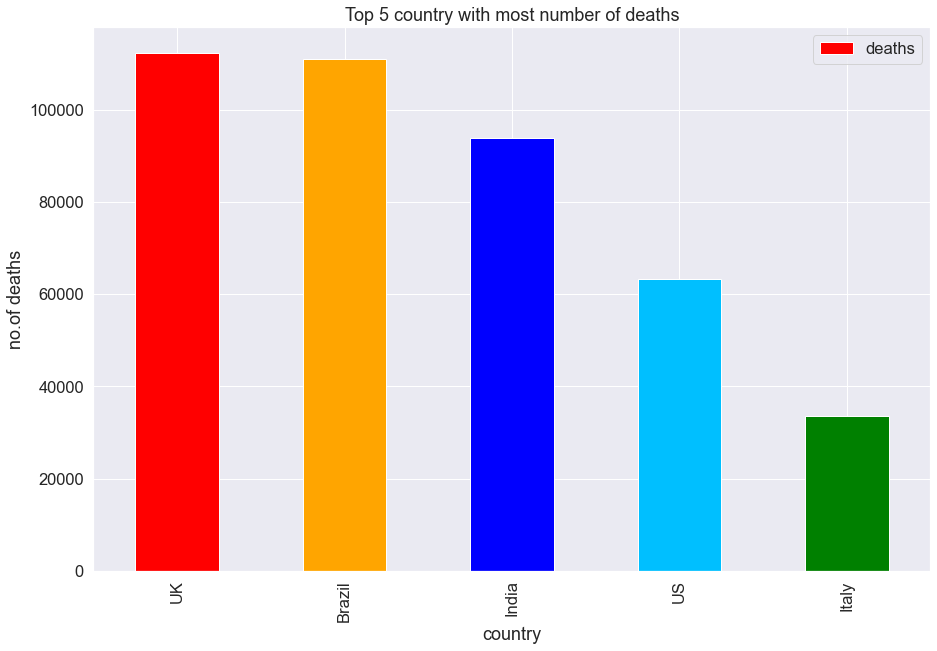

In [113]:
#Top states with highest deaths

top_10_deaths.reset_index().plot(kind='bar',x='country',y='deaths',title='Top 5 country with most number of deaths',color=['red','orange','blue','deepskyblue','green'],figsize=(15,10))
plt.ylabel("no.of deaths")
#sns.set(font_scale=3)

<AxesSubplot:title={'center':'Top 10 country with most number of cured cases'}, ylabel='country'>

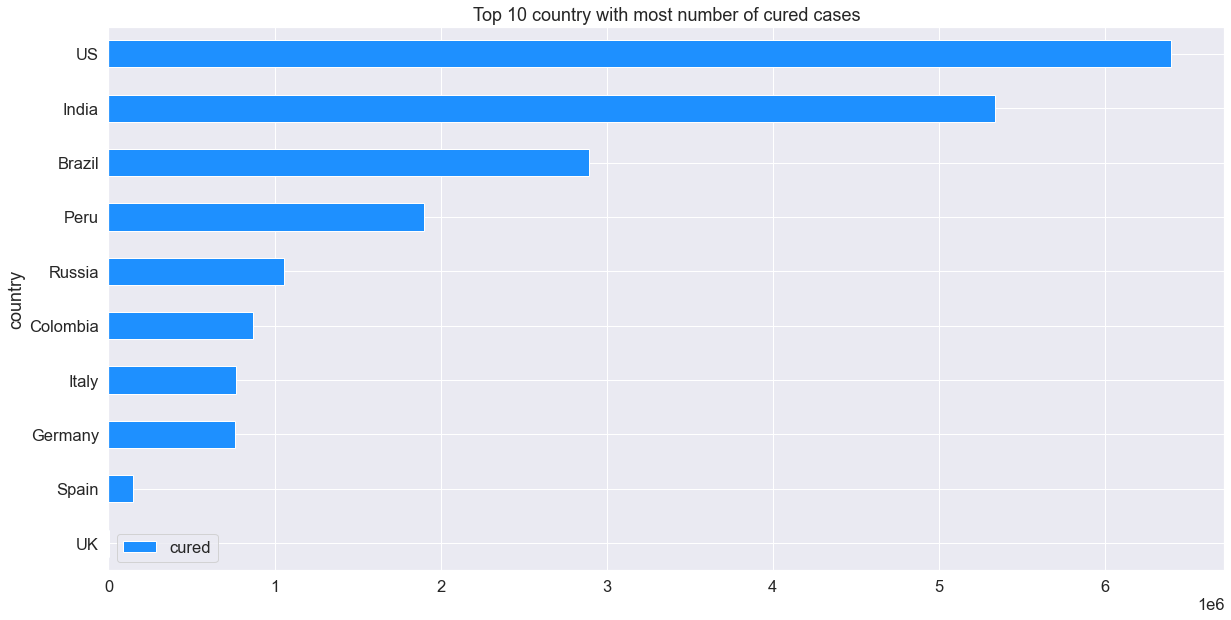

In [114]:
top_10=country.head(10)
top_10_cured=top_10.sort_values(by='cured',)
top_10_cured.reset_index().plot(kind='barh',x='country',y='cured',title='Top 10 country with most number of cured cases',color=['dodgerblue'],figsize=(20,10))
#sns.set(font_scale=1.5)

<AxesSubplot:title={'center':'Top 7 country with most number of r_rate'}, xlabel='country', ylabel='r_rate'>

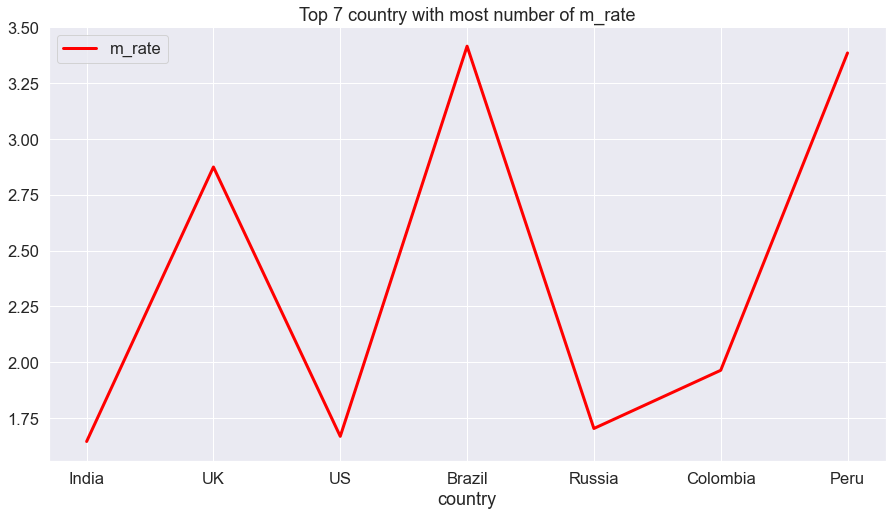

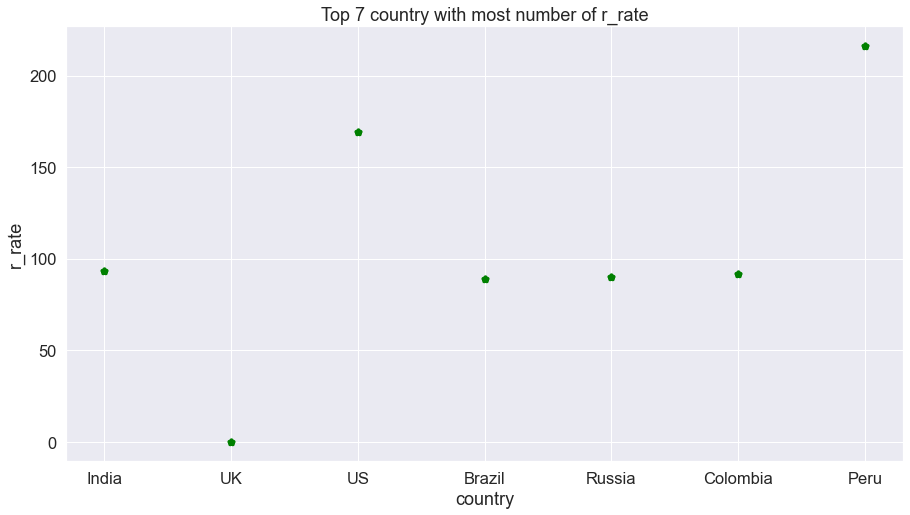

In [129]:
top_10=country.head(7)
top_10.reset_index().plot(kind='line',x='country',y='m_rate',title='Top 7 country with most number of m_rate',color='red',linestyle='-',linewidth=3,figsize=(15,8))
top_10.reset_index().plot(kind='scatter',x='country',y='r_rate',title='Top 7 country with most number of r_rate',color='green',marker='*',linewidth=4,figsize=(15,8))

In [38]:
top_ac=cd[cd.country=="India"]
top_ac

,date,state,country,confirmed,deaths,cured,active
39260,2020-10-06,Andaman and Nicobar Islands,India,33,0,33,0
39261,2020-10-06,Andhra Pradesh,India,5070,77,2802,2191
39277,2020-10-06,Arunachal Pradesh,India,57,0,1,56
39278,2020-10-06,Assam,India,2937,4,1085,1848
39300,2020-10-06,Bihar,India,5459,32,2864,2563
...,...,...,...,...,...,...,...
306351,2021-05-29,Tripura,India,50739,507,43190,7042
306366,2021-05-29,Unknown,India,0,0,0,0
306377,2021-05-29,Uttar Pradesh,India,1688152,20208,1621743,46201
306378,2021-05-29,Uttarakhand,India,327112,6360,289642,31110


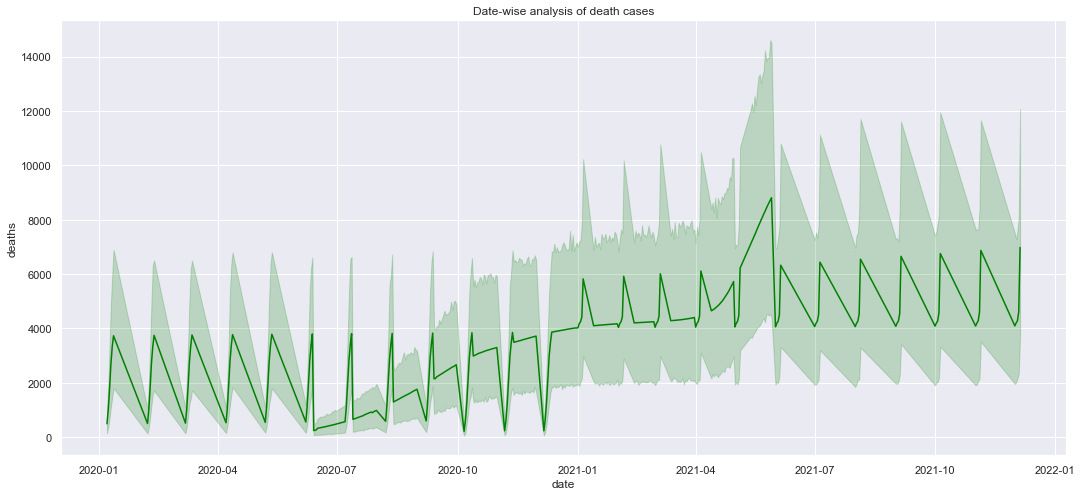

In [161]:
top_10=country.head(10)
sns.lineplot(y='deaths',x='date',color='green',data=top_ac).set(title="Date-wise analysis of death cases")
sns.set(rc={'figure.figsize':(18,8)})
#sns.set(font_scale=3)

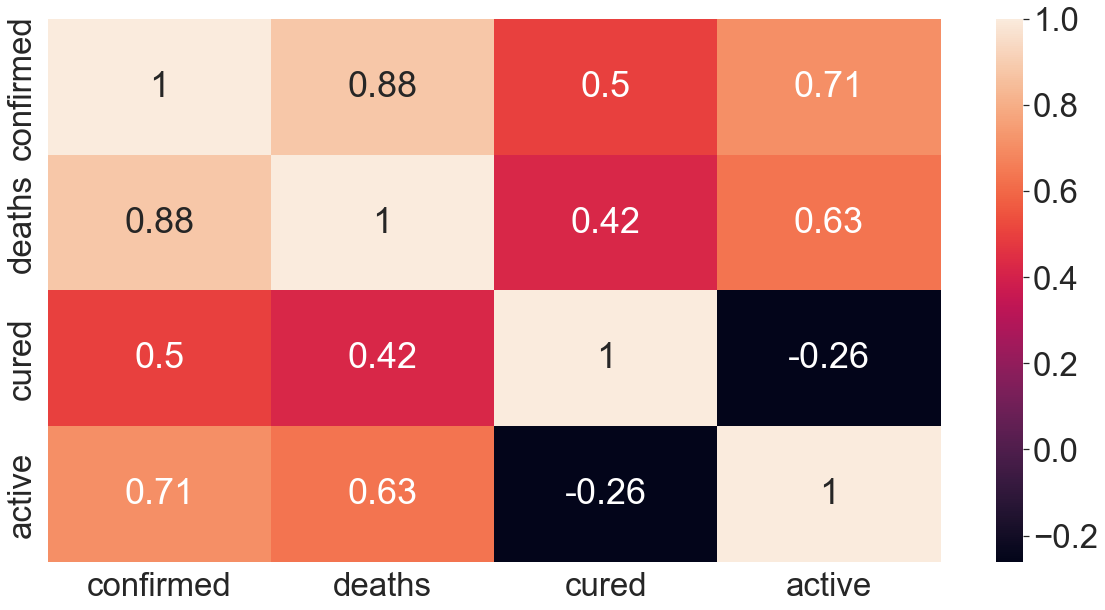

In [40]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(cd.corr(),annot=True)

sns.set(font_scale=2)
plt.show()

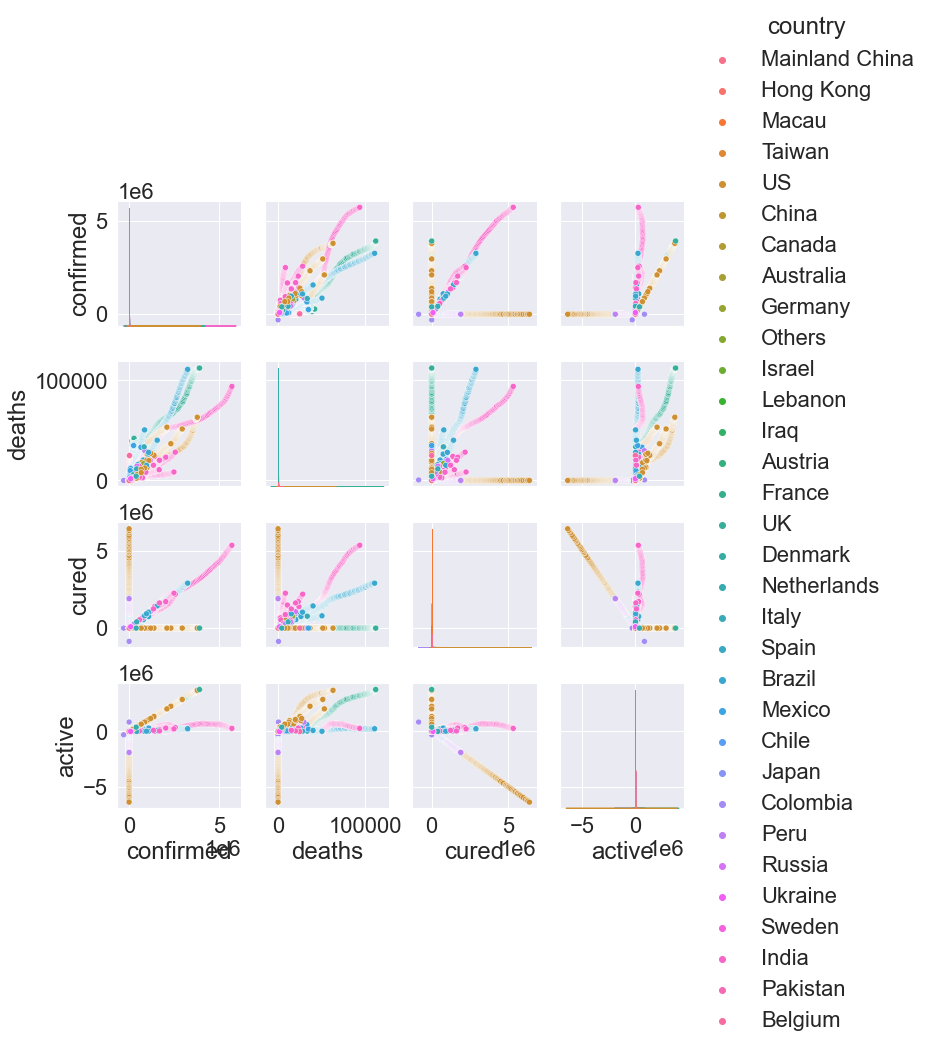

In [41]:
sns.pairplot(cd,hue="country")
plt.show()

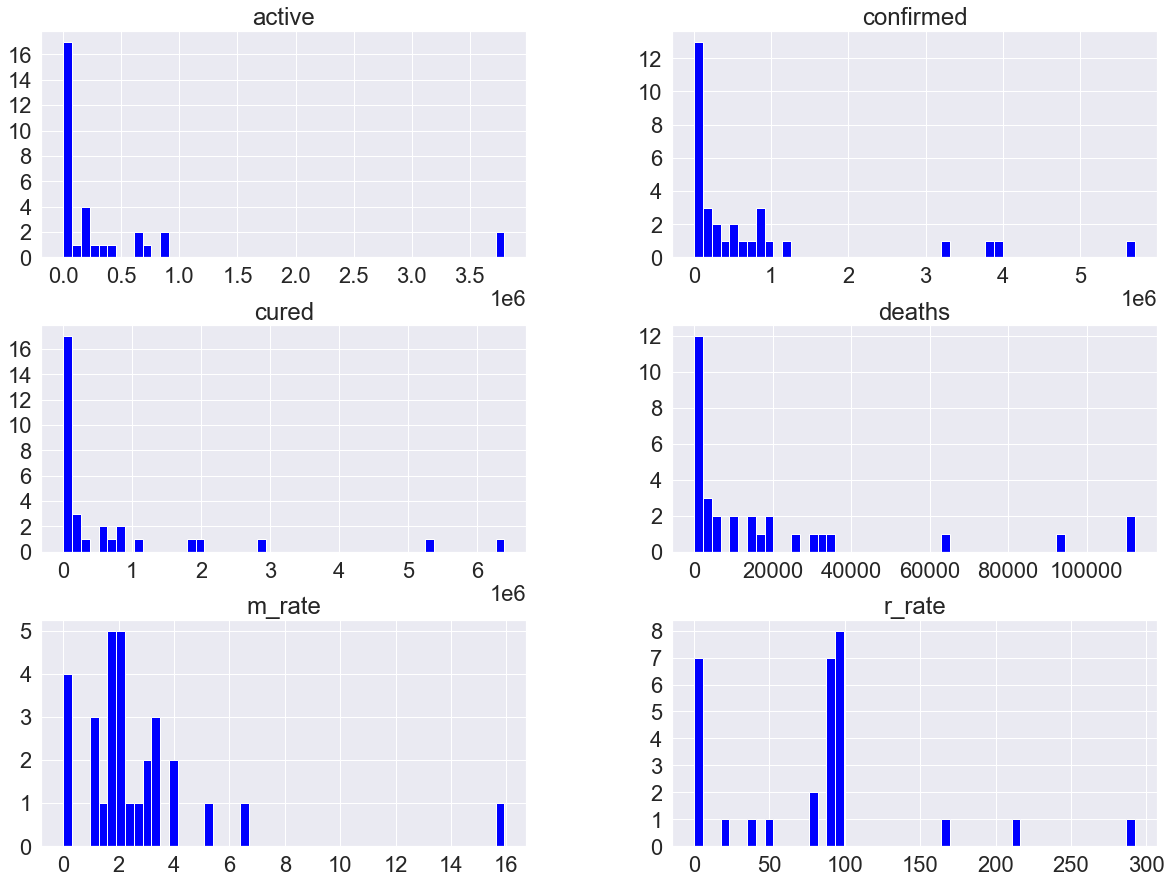

In [42]:
country.hist(figsize=(20,15),bins=50,color='blue')
sns.set(font_scale=1)

In [43]:
state=cd.pivot_table(index='state',values=['confirmed','deaths','cured','active'],aggfunc=max)

In [44]:
state=state.sort_values(by='confirmed',ascending=False)

In [45]:
top_5=state.head()


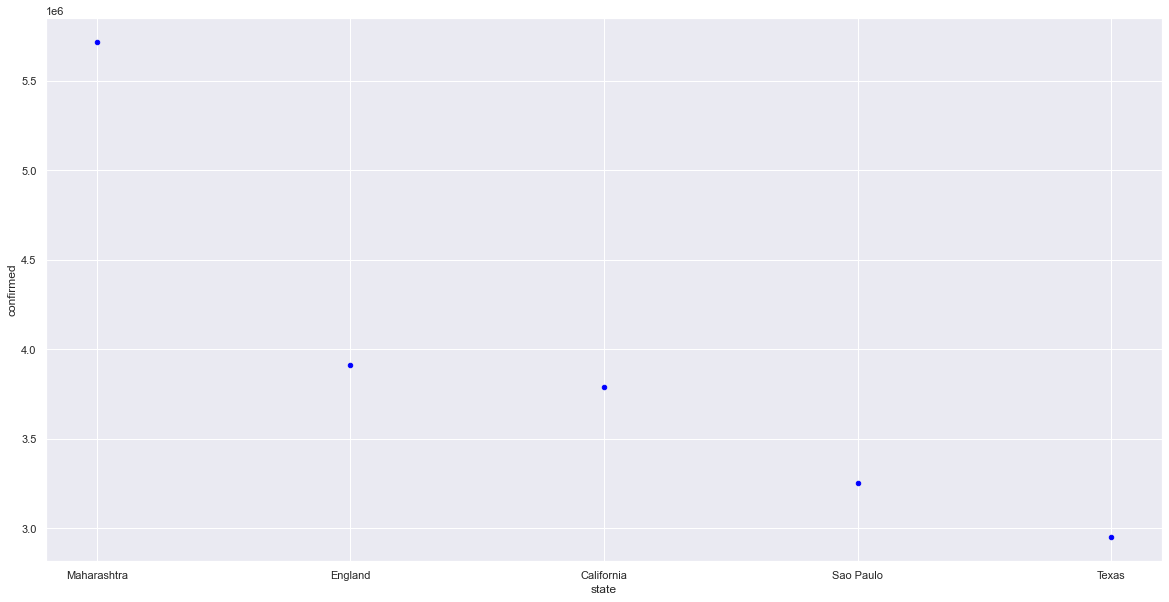

In [46]:
top_5.reset_index().plot(kind='scatter',x='state',y='confirmed',color='blue',figsize=(20,10))
sns.set(font_scale=1)

In [2]:
pip install folium

In [61]:
import pandas as pd
import folium
from folium.plugins import HeatMap

df = pd.read_csv("covid_19_data.csv")
m = folium.Map(tiles = 'Stamen Terrain',min_zoom = 1.5)
display(m)

In [62]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'
folium.Choropleth(
    geo_data = country_shapes,
    min_zoom=2,
    name='Covid-19',
    data=df,
    columns=['Country/Region', 'Confirmed'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    nan_fill_color='black',
    legend_name = 'Total Confirmed COVID cases',
).add_to(m)
m

# Step 6 : Act/Conclusion/Findings

#In the final step, we will be delivering our key insights 

1. What are the top country with highest number of deaths?
-> In UK number of deaths is comparatively higher (i.e above 1 lakhs)than the lower country that has least number of deaths like Brazil, India, US A=and Italy.

2. What are the top country with maximum number of active cases?
-> UK and US are amongst the most number of active cases affected by covid-19 and the data for this viz is above 37 lakhs as comapare to other countries.

3. What are the top country with maximum number of cured cases?
->Although US,INDIA,BRAZIL,PERU,RUSSIA,COLUMBIA,ITALY,GERMANY,SPAIN UK are the top country but amongst these countries US and INDIA are having the most cured cases.

4. What are the top country with most number of confirmed cases?
-> INDIA ,UK ,US ,BRAZIL and six other countries having the most confirmed cases but as compared to INDIA their cases are significantly lower but still high. 

5. What are the top country with most number of m_rate and r_rate?
-> BRAZIL and PERU has higher m_rate(mortality rate) but in case of r_rate data is different as PERU and US are having the higher r_rate(recovery rate)